In [1]:
#Importing regular EDA and plotting libraries
import pandas as pd
import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns

#Loading models
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.linear_model import LogisticRegression

#Loading Model evaluators
#from sklearn.metrics import confusion_matrix, classification_report
#from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.model_selection import train_test_split, cross_val_score
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#from sklearn.metrics import plot_roc_curve

In [2]:
dataset = pd.read_csv('Heart.csv')
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
dataset.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
quan = dataset.columns

In [5]:
descriptive = pd.DataFrame(index = ["mean",'median','mode', 'min','25%','50%','75%','max',
                                    'IQR','1.5IQR','lesserRange','greaterRange'], columns = quan)
for columnName in quan:
    descriptive[columnName]['mean']= dataset[columnName].mean()
    descriptive[columnName]['median']= dataset[columnName].median()
    descriptive[columnName]['mode'] = dataset[columnName].mode()[0]
    descriptive[columnName]['min'] = dataset[columnName].min()
    descriptive[columnName]['25%'] = dataset.describe()[columnName]['25%']
    descriptive[columnName]['50%'] = dataset.describe()[columnName]['50%']
    descriptive[columnName]['75%'] = dataset.describe()[columnName]['75%']
    descriptive[columnName]['max'] = dataset.describe()[columnName]['max']
    descriptive[columnName]['IQR'] = descriptive[columnName]['75%']-descriptive[columnName]['25%']
    descriptive[columnName]['1.5IQR'] = descriptive[columnName]['IQR']*1.5
    descriptive[columnName]['lesserRange'] = descriptive[columnName]['25%']-descriptive[columnName]['1.5IQR']
    descriptive[columnName]['greaterRange'] = descriptive[columnName]['75%']+descriptive[columnName]['1.5IQR']
    
descriptive

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
mean,54.3663,0.683168,0.966997,131.624,246.264,0.148515,0.528053,149.647,0.326733,1.0396,1.39934,0.729373,2.31353,0.544554
median,55,1,1,130,240,0,1,153,0,0.8,1,0,2,1
mode,58,1,0,120,197,0,1,162,0,0,2,0,2,1
min,29,0,0,94,126,0,0,71,0,0,0,0,0,0
25%,47.5,0,0,120,211,0,0,133.5,0,0,1,0,2,0
50%,55,1,1,130,240,0,1,153,0,0.8,1,0,2,1
75%,61,1,2,140,274.5,0,1,166,1,1.6,2,1,3,1
max,77,1,3,200,564,1,2,202,1,6.2,2,4,3,1
IQR,13.5,1,2,20,63.5,0,1,32.5,1,1.6,1,1,1,1
1.5IQR,20.25,1.5,3,30,95.25,0,1.5,48.75,1.5,2.4,1.5,1.5,1.5,1.5


In [6]:
lesser = []
greater = []

for columnName in quan:
    if(descriptive[columnName]['min']<descriptive[columnName]['lesserRange']):
        lesser.append(columnName)
    if (descriptive[columnName]['max']> descriptive[columnName]['greaterRange']):
        greater.append(columnName)

In [7]:
for lesscolumn in lesser:
    dataset.loc [dataset[lesscolumn]<descriptive[lesscolumn]['lesserRange'], lesscolumn]=descriptive[lesscolumn]['lesserRange']
for greatercolumn in greater:
    # Syntax: df.loc[row_indexer, column_indexer] = value
    dataset.loc[dataset[greatercolumn] > descriptive[greatercolumn]['greaterRange'], 
                greatercolumn] = descriptive[greatercolumn]['greaterRange']

In [8]:
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,0.0,0,150.0,0,2.3,0,0.0,1.0,1
1,37,1,2,130.0,250.0,0.0,1,187.0,0,3.5,0,0.0,2.0,1
2,41,0,1,130.0,204.0,0.0,0,172.0,0,1.4,2,0.0,2.0,1
3,56,1,1,120.0,236.0,0.0,1,178.0,0,0.8,2,0.0,2.0,1
4,57,0,0,120.0,354.0,0.0,1,163.0,1,0.6,2,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0.0,1,123.0,1,0.2,1,0.0,3.0,0
299,45,1,3,110.0,264.0,0.0,1,132.0,0,1.2,1,0.0,3.0,0
300,68,1,0,144.0,193.0,0.0,1,141.0,0,3.4,1,2.0,3.0,0
301,57,1,0,130.0,131.0,0.0,1,115.0,1,1.2,1,1.0,3.0,0


In [9]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.0,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.280528,245.134488,0.0,0.528053,149.692244,0.326733,1.024422,1.399340,0.671617,2.316832,0.544554
std,9.082101,0.466011,1.032052,16.582241,47.552910,0.0,0.525860,22.762004,0.469794,1.110127,0.616226,0.885078,0.601004,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.0,0.000000,84.750000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.0,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.0,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.0,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,170.000000,369.750000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.500000,3.000000,1.000000


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null int64
thalach     303 non-null float64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null float64
thal        303 non-null float64
target      303 non-null int64
dtypes: float64(7), int64(7)
memory usage: 33.3 KB


In [11]:
dataset.target.value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [12]:
dataset.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
pd.crosstab(dataset.target,dataset.sex)

sex,0,1
target,,
0,24,114
1,72,93


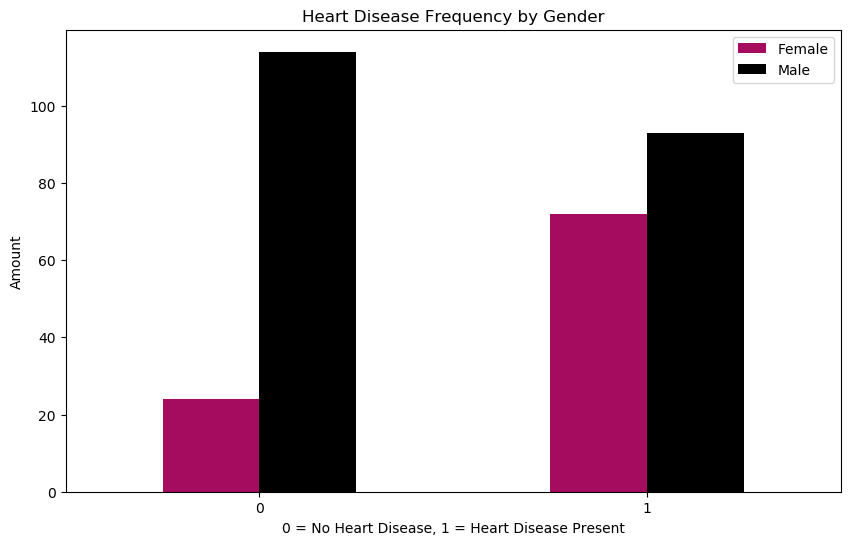

In [14]:
import matplotlib.pyplot as plt
pd.crosstab(dataset.target, dataset.sex).plot(kind="bar", 
                                    figsize=(10,6), 
                                    color=["#a50b5e", "black"])

plt.title("Heart Disease Frequency by Gender")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease Present")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

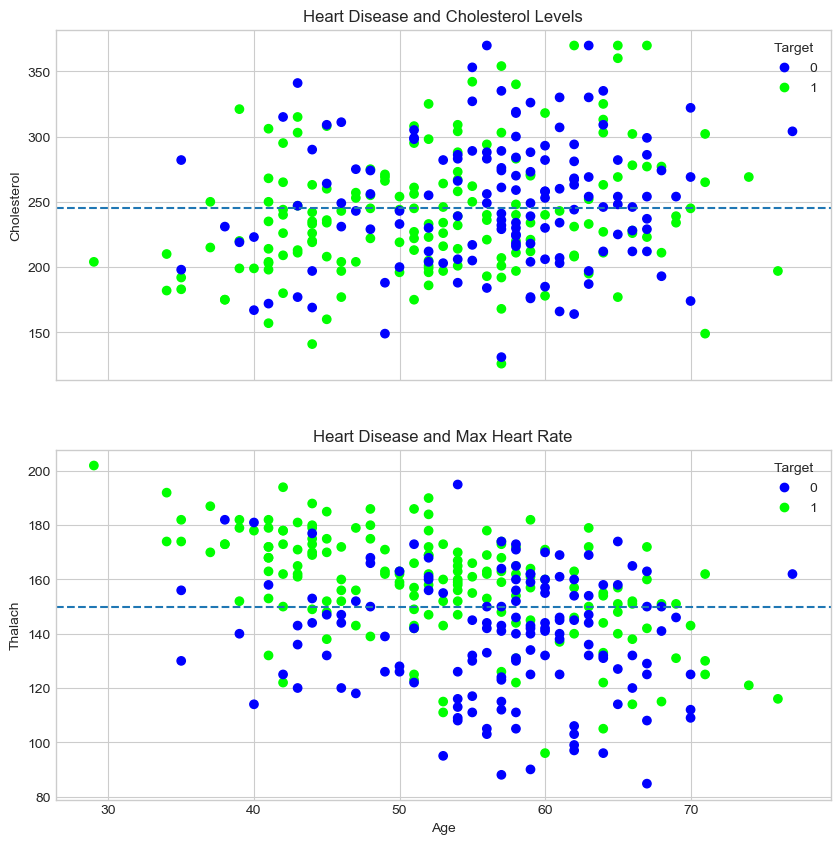

In [15]:
#import seaborn as sns
df = dataset
plt.style.use('seaborn-whitegrid')

# Subplots of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                             ncols=1,
                             figsize=(10, 10),
                               sharex=True)

scatter = ax0.scatter(x=df["age"],
                     y=df["chol"],
                     c=df["target"],
                     cmap="brg")
ax0.set(title="Heart Disease and Cholesterol Levels",
       ylabel="Cholesterol")

ax0.legend(*scatter.legend_elements(), title="Target")
ax0.axhline(y=df["chol"].mean(),
           linestyle="--");


scatter = ax1.scatter(x=df["age"],
                     y=df["thalach"],
                     c=df["target"],
                     cmap="brg")
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Thalach")

ax1.legend(*scatter.legend_elements(), title="Target")
ax1.axhline(y=df["thalach"].mean(),
           linestyle="--");

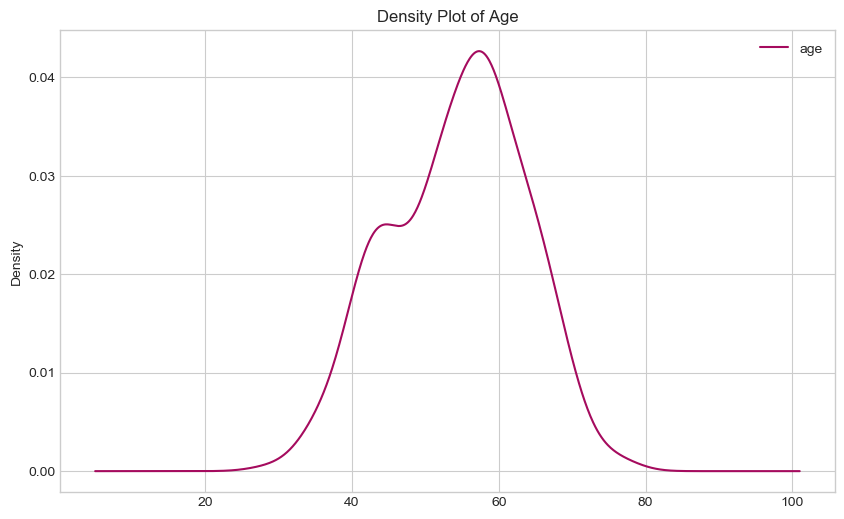

In [16]:
pd.DataFrame(df['age']).plot(kind='density', figsize=(10, 6), 
                             color=['#a50b5e'])

plt.title("Density Plot of Age")
plt.show()

In [17]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


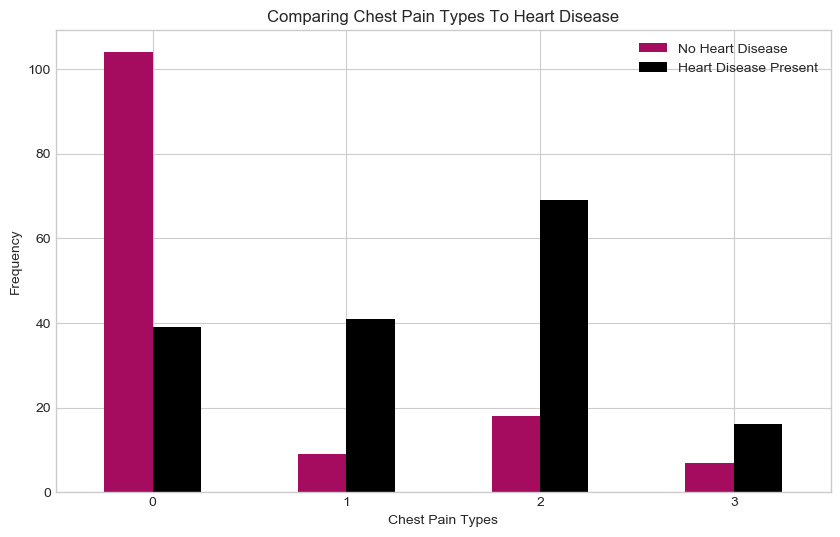

In [18]:
pd.crosstab(df.cp, df.target).plot(kind='bar', 
                                   figsize=(10, 6), 
                                   color=["#a50b5e", "black"])

plt.title("Comparing Chest Pain Types To Heart Disease")
plt.xlabel("Chest Pain Types")
plt.ylabel("Frequency")
plt.legend(["No Heart Disease", "Heart Disease Present"])
plt.xticks(rotation=0);

In [19]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.286134,0.205856,NaN,-0.116211,-0.398246,0.096801,0.213242,-0.168814,0.322934,0.068145,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.047594,-0.180779,NaN,-0.058196,-0.042937,0.141664,0.105256,-0.030711,0.108181,0.211815,-0.280937
cp,-0.068653,-0.049353,1.000000,0.056267,-0.094081,NaN,0.044421,0.295748,-0.394280,-0.144957,0.119717,-0.205842,-0.164593,0.433798
trestbps,0.286134,-0.047594,0.056267,1.000000,0.132934,NaN,-0.116535,-0.053717,0.055354,0.180601,-0.113723,0.101281,0.050194,-0.138621
chol,0.205856,-0.180779,-0.094081,0.132934,1.000000,NaN,-0.140696,-0.019543,0.083809,0.057323,0.005704,0.097144,0.086704,-0.103987
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,-0.116211,-0.058196,0.044421,-0.116535,-0.140696,NaN,1.000000,0.046196,-0.070733,-0.062437,0.093045,-0.088637,-0.012500,0.137230
thalach,-0.398246,-0.042937,0.295748,-0.053717,-0.019543,NaN,0.046196,1.000000,-0.382586,-0.351496,0.387921,-0.237810,-0.103345,0.422210
exang,0.096801,0.141664,-0.394280,0.055354,0.083809,NaN,-0.070733,-0.382586,1.000000,0.299565,-0.257748,0.139440,0.212664,-0.436757
oldpeak,0.213242,0.105256,-0.144957,0.180601,0.057323,NaN,-0.062437,-0.351496,0.299565,1.000000,-0.573853,0.251845,0.209713,-0.436680


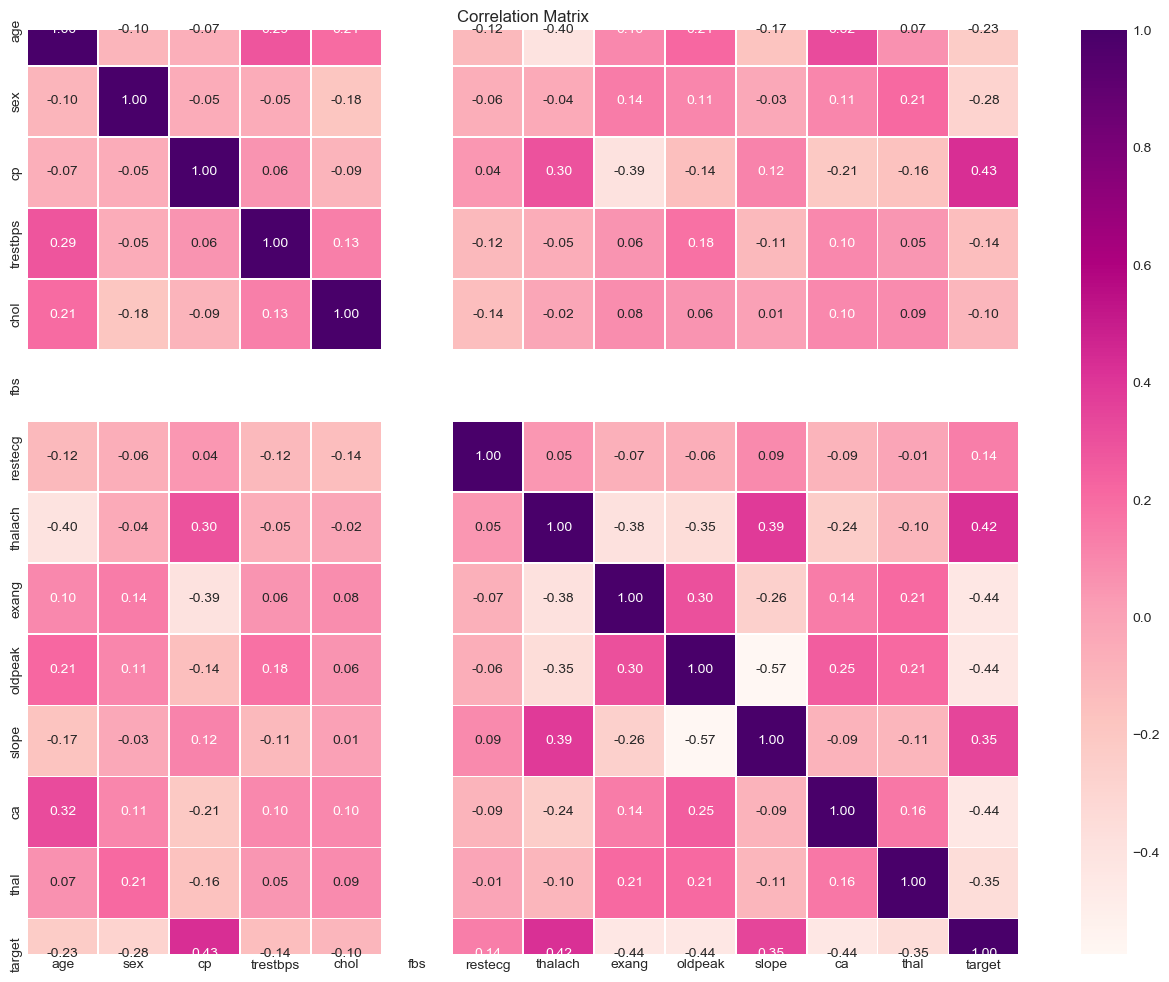

In [20]:
import seaborn as sns
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(16, 12))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt=".2f",
                cmap="RdPu")

ax.set_title('Correlation Matrix');

In [21]:
pd.crosstab(df.restecg,df.target)

target,0,1
restecg,,
0,79,68
1,56,96
2,3,1


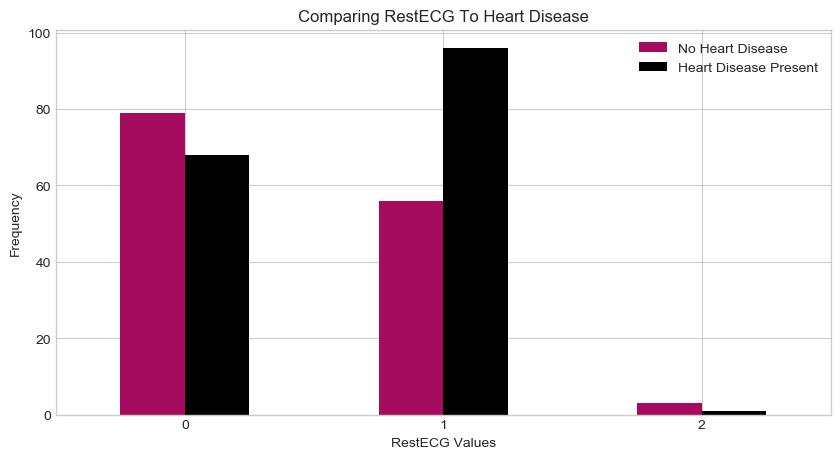

In [22]:
pd.crosstab(df.restecg, df.target).plot(kind='bar', 
                                   figsize=(10, 5), 
                                   color=["#a50b5e", "black"])

plt.title("Comparing RestECG To Heart Disease")
plt.xlabel("RestECG Values")
plt.ylabel("Frequency")
plt.legend(["No Heart Disease", "Heart Disease Present"])
plt.xticks(rotation=0);

In [23]:
X = df.drop('target', axis = 1)
y = df['target']

In [24]:

np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np # Needed for array conversion, which helps prevent TerminatedWorkerError

# Initialize the base model with necessary fixes
base_model = LogisticRegression(
    max_iter=10000,
    class_weight='balanced',
    random_state=42
)


paramgrid = [
    # L1 Penalty
    {'penalty': ['l1'],
     'C': [0.1, 1, 10, 100], # Removed C=0.001 and C=0.01 to avoid UndefinedMetricWarning
     'solver': ['liblinear', 'saga']},

    # L2 Penalty
    {'penalty': ['l2'],
     'C': [0.1, 1, 10, 100], # Removed C=0.001 and C=0.01
     'solver': ['liblinear', 'lbfgs', 'saga']},

    # Elasticnet Penalty
    {'penalty': ['elasticnet'],
     'l1_ratio': [0.1, 0.5, 0.9],
     'C': [0.1, 1, 10, 100], # Removed C=0.001 and C=0.01
     'solver': ['saga']},

    # Parameters for NO PENALTY (Unregularized)
    # FIX: Changed penalty from [None] (Python object) to ['none'] (string)
    {'penalty': ['none'], 
     'C': [1], 
     'solver': ['lbfgs', 'sag']} 
]


# Optional: Ensure data is float64 to prevent potential low-level crashes
# X_train = X_train.astype(np.float64) 

grid = GridSearchCV(
    estimator=base_model,
    param_grid=paramgrid,
    refit=True,
    verbose=3,
    n_jobs=1,              # Keeping n_jobs=1 to avoid the TerminatedWorkerError
    scoring="f1_weighted",
    cv=5
)

# grid.fit(X_train, y_train) # Call this to run the corrected grid search


In [27]:
grid.fit(X_train, y_train) # Call this to run the corrected grid search

Fitting 5 folds for each of 34 candidates, totalling 170 fits
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] . C=0.1, penalty=l1, solver=liblinear, score=0.780, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] . C=0.1, penalty=l1, solver=liblinear, score=0.639, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] . C=0.1, penalty=l1, solver=liblinear, score=0.833, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] . C=0.1, penalty=l1, solver=liblinear, score=0.811, total=   0.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] . C=0.1, penalty=l1, solver=liblinear, score=0.812, total=   0.0s
[CV] C=0.1, penalty=l1, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=0.1, penalty=l1, solver=saga, score=0.780, total=   0.5s
[CV] C=0.1, penalty=l1, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=0.1, penalty=l1, solver=saga, score=0.620, total=   0.5s
[CV] C=0.1, penalty=l1, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=0.1, penalty=l1, solver=saga, score=0.812, total=   0.4s
[CV] C=0.1, penalty=l1, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=0.1, penalty=l1, solver=saga, score=0.811, total=   0.5s
[CV] C=0.1, penalty=l1, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=0.1, penalty=l1, solver=saga, score=0.771, total=   0.5s
[CV] C=1, penalty=l1, solver=liblinear ...............................
[CV] ... C=1, penalty=l1, solver=liblinear, score=0.760, total=   0.0s
[CV] C=1, penalty=l1, solver=liblinear ...............................
[CV] ... C=1, penalty=l1, solver=liblinear, score=0.782, total=   0.0s
[CV] C=1, penalty=l1, solver=liblinear ...............................
[CV] ... C=1, penalty=l1, solver=liblinear, score=0.834, total=   0.0s
[CV] C=1, penalty=l1, solver=liblinear ...............................
[CV] ... C=1, penalty=l1, solver=liblinear, score=0.854, total=   0.0s
[CV] C=1, penalty=l1, solver=liblinear ...............................
[CV] ... C=1, penalty=l1, solver=liblinear, score=0.833, total=   0.0s
[CV] C=1, penalty=l1, solver=saga ....................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ........ C=1, penalty=l1, solver=saga, score=0.799, total=   0.7s
[CV] C=1, penalty=l1, solver=saga ....................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ........ C=1, penalty=l1, solver=saga, score=0.720, total=   0.6s
[CV] C=1, penalty=l1, solver=saga ....................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ........ C=1, penalty=l1, solver=saga, score=0.875, total=   0.6s
[CV] C=1, penalty=l1, solver=saga ....................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ........ C=1, penalty=l1, solver=saga, score=0.854, total=   0.6s
[CV] C=1, penalty=l1, solver=saga ....................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ........ C=1, penalty=l1, solver=saga, score=0.812, total=   0.6s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.760, total=   0.0s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.806, total=   0.0s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.834, total=   0.0s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.854, total=   0.0s
[CV] C=10, penalty=l1, solver=liblinear ..............................
[CV] .. C=10, penalty=l1, solver=liblinear, score=0.833, total=   0.0s
[CV] C=10, penalty=l1, solver=saga ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=10, penalty=l1, solver=saga, score=0.799, total=   0.7s
[CV] C=10, penalty=l1, solver=saga ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=10, penalty=l1, solver=saga, score=0.720, total=   0.6s
[CV] C=10, penalty=l1, solver=saga ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=10, penalty=l1, solver=saga, score=0.896, total=   0.7s
[CV] C=10, penalty=l1, solver=saga ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=10, penalty=l1, solver=saga, score=0.854, total=   0.6s
[CV] C=10, penalty=l1, solver=saga ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=10, penalty=l1, solver=saga, score=0.832, total=   0.6s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.740, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.786, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.834, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.854, total=   0.0s
[CV] C=100, penalty=l1, solver=liblinear .............................
[CV] . C=100, penalty=l1, solver=liblinear, score=0.833, total=   0.0s
[CV] C=100, penalty=l1, solver=saga ..................................


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    8.9s
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=100, penalty=l1, solver=saga, score=0.799, total=   0.8s
[CV] C=100, penalty=l1, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=100, penalty=l1, solver=saga, score=0.720, total=   0.6s
[CV] C=100, penalty=l1, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=100, penalty=l1, solver=saga, score=0.896, total=   0.7s
[CV] C=100, penalty=l1, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=100, penalty=l1, solver=saga, score=0.854, total=   0.6s
[CV] C=100, penalty=l1, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=100, penalty=l1, solver=saga, score=0.832, total=   0.6s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.799, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.720, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.896, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.832, total=   0.0s
[CV] C=0.1, penalty=l2, solver=liblinear .............................
[CV] . C=0.1, penalty=l2, solver=liblinear, score=0.832, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.799, total=   0.2s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.763, total=   0.2s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.896, total=   0.0s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.832, total=   0.2s
[CV] C=0.1, penalty=l2, solver=lbfgs .................................
[CV] ..... C=0.1, penalty=l2, solver=lbfgs, score=0.832, total=   0.0s
[CV] C=0.1, penalty=l2, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=0.1, penalty=l2, solver=saga, score=0.818, total=   0.4s
[CV] C=0.1, penalty=l2, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=0.1, penalty=l2, solver=saga, score=0.700, total=   0.3s
[CV] C=0.1, penalty=l2, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=0.1, penalty=l2, solver=saga, score=0.896, total=   0.4s
[CV] C=0.1, penalty=l2, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=0.1, penalty=l2, solver=saga, score=0.854, total=   0.3s
[CV] C=0.1, penalty=l2, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=0.1, penalty=l2, solver=saga, score=0.770, total=   0.3s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ... C=1, penalty=l2, solver=liblinear, score=0.760, total=   0.0s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ... C=1, penalty=l2, solver=liblinear, score=0.782, total=   0.0s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ... C=1, penalty=l2, solver=liblinear, score=0.896, total=   0.0s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ... C=1, penalty=l2, solver=liblinear, score=0.854, total=   0.0s
[CV] C=1, penalty=l2, solver=liblinear ...............................
[CV] ... C=1, penalty=l2, solver=liblinear, score=0.813, total=   0.0s
[CV] C=1, penalty=l2, solver=lbfgs ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=1, penalty=l2, solver=lbfgs, score=0.740, total=   0.3s
[CV] C=1, penalty=l2, solver=lbfgs ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=1, penalty=l2, solver=lbfgs, score=0.782, total=   0.3s
[CV] C=1, penalty=l2, solver=lbfgs ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=1, penalty=l2, solver=lbfgs, score=0.854, total=   0.3s
[CV] C=1, penalty=l2, solver=lbfgs ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=1, penalty=l2, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=1, penalty=l2, solver=lbfgs ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=1, penalty=l2, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=1, penalty=l2, solver=saga ....................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ........ C=1, penalty=l2, solver=saga, score=0.799, total=   0.5s
[CV] C=1, penalty=l2, solver=saga ....................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ........ C=1, penalty=l2, solver=saga, score=0.720, total=   0.4s
[CV] C=1, penalty=l2, solver=saga ....................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ........ C=1, penalty=l2, solver=saga, score=0.896, total=   0.5s
[CV] C=1, penalty=l2, solver=saga ....................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ........ C=1, penalty=l2, solver=saga, score=0.854, total=   0.4s
[CV] C=1, penalty=l2, solver=saga ....................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ........ C=1, penalty=l2, solver=saga, score=0.812, total=   0.4s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.760, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.782, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.834, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.854, total=   0.0s
[CV] C=10, penalty=l2, solver=liblinear ..............................
[CV] .. C=10, penalty=l2, solver=liblinear, score=0.833, total=   0.0s
[CV] C=10, penalty=l2, solver=lbfgs ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.740, total=   0.3s
[CV] C=10, penalty=l2, solver=lbfgs ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.806, total=   0.3s
[CV] C=10, penalty=l2, solver=lbfgs ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.834, total=   0.4s
[CV] C=10, penalty=l2, solver=lbfgs ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.854, total=   0.3s
[CV] C=10, penalty=l2, solver=lbfgs ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=10, penalty=l2, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=10, penalty=l2, solver=saga ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=10, penalty=l2, solver=saga, score=0.799, total=   0.8s
[CV] C=10, penalty=l2, solver=saga ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=10, penalty=l2, solver=saga, score=0.720, total=   0.4s
[CV] C=10, penalty=l2, solver=saga ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=10, penalty=l2, solver=saga, score=0.896, total=   0.5s
[CV] C=10, penalty=l2, solver=saga ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=10, penalty=l2, solver=saga, score=0.854, total=   0.4s
[CV] C=10, penalty=l2, solver=saga ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=10, penalty=l2, solver=saga, score=0.832, total=   0.4s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] . C=100, penalty=l2, solver=liblinear, score=0.740, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] . C=100, penalty=l2, solver=liblinear, score=0.806, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] . C=100, penalty=l2, solver=liblinear, score=0.834, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] . C=100, penalty=l2, solver=liblinear, score=0.854, total=   0.0s
[CV] C=100, penalty=l2, solver=liblinear .............................
[CV] . C=100, penalty=l2, solver=liblinear, score=0.833, total=   0.0s
[CV] C=100, penalty=l2, solver=lbfgs .................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.740, total=   0.4s
[CV] C=100, penalty=l2, solver=lbfgs .................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.786, total=   0.3s
[CV] C=100, penalty=l2, solver=lbfgs .................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.834, total=   0.3s
[CV] C=100, penalty=l2, solver=lbfgs .................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.854, total=   0.2s
[CV] C=100, penalty=l2, solver=lbfgs .................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ..... C=100, penalty=l2, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=100, penalty=l2, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=100, penalty=l2, solver=saga, score=0.799, total=   0.5s
[CV] C=100, penalty=l2, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=100, penalty=l2, solver=saga, score=0.720, total=   0.4s
[CV] C=100, penalty=l2, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=100, penalty=l2, solver=saga, score=0.896, total=   0.5s
[CV] C=100, penalty=l2, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=100, penalty=l2, solver=saga, score=0.854, total=   0.4s
[CV] C=100, penalty=l2, solver=saga ..................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ...... C=100, penalty=l2, solver=saga, score=0.832, total=   0.4s
[CV] C=0.1, l1_ratio=0.1, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.818, total=   0.5s
[CV] C=0.1, l1_ratio=0.1, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.700, total=   0.5s
[CV] C=0.1, l1_ratio=0.1, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.874, total=   0.5s
[CV] C=0.1, l1_ratio=0.1, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.854, total=   0.5s
[CV] C=0.1, l1_ratio=0.1, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.770, total=   0.5s
[CV] C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.818, total=   0.5s
[CV] C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.676, total=   0.5s
[CV] C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.833, total=   0.5s
[CV] C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.854, total=   0.5s
[CV] C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.770, total=   0.5s
[CV] C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.780, total=   0.5s
[CV] C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.620, total=   0.5s
[CV] C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.833, total=   0.5s
[CV] C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.811, total=   0.5s
[CV] C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=0.1, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.771, total=   0.5s
[CV] C=1, l1_ratio=0.1, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.799, total=   0.7s
[CV] C=1, l1_ratio=0.1, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.720, total=   0.6s
[CV] C=1, l1_ratio=0.1, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.896, total=   0.7s
[CV] C=1, l1_ratio=0.1, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.854, total=   0.6s
[CV] C=1, l1_ratio=0.1, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.812, total=   0.6s
[CV] C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.799, total=   0.7s
[CV] C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.720, total=   0.6s
[CV] C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.896, total=   0.6s
[CV] C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.854, total=   0.6s
[CV] C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.812, total=   0.6s
[CV] C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.799, total=   0.7s
[CV] C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.720, total=   0.6s
[CV] C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga ..............


[Parallel(n_jobs=1)]: Done 127 tasks      | elapsed:   41.1s
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.875, total=   0.6s
[CV] C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.854, total=   0.6s
[CV] C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga ..............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=1, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.812, total=   0.6s
[CV] C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.799, total=   0.8s
[CV] C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.720, total=   0.9s
[CV] C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.896, total=   0.7s
[CV] C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.854, total=   0.6s
[CV] C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.832, total=   0.6s
[CV] C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.799, total=   0.8s
[CV] C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.720, total=   0.6s
[CV] C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.896, total=   0.7s
[CV] C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.854, total=   0.6s
[CV] C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.832, total=   0.6s
[CV] C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.799, total=   0.8s
[CV] C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.720, total=   0.6s
[CV] C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.896, total=   0.7s
[CV] C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.854, total=   0.6s
[CV] C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga .............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=10, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.832, total=   0.6s
[CV] C=100, l1_ratio=0.1, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.799, total=   0.8s
[CV] C=100, l1_ratio=0.1, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.720, total=   0.6s
[CV] C=100, l1_ratio=0.1, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.896, total=   0.7s
[CV] C=100, l1_ratio=0.1, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.854, total=   0.6s
[CV] C=100, l1_ratio=0.1, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.1, penalty=elasticnet, solver=saga, score=0.832, total=   0.6s
[CV] C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.799, total=   0.8s
[CV] C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.720, total=   0.6s
[CV] C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.896, total=   0.7s
[CV] C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.854, total=   0.6s
[CV] C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.5, penalty=elasticnet, solver=saga, score=0.832, total=   0.6s
[CV] C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.799, total=   0.7s
[CV] C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.720, total=   0.7s
[CV] C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.896, total=   0.7s
[CV] C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.854, total=   0.6s
[CV] C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga ............


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV]  C=100, l1_ratio=0.9, penalty=elasticnet, solver=saga, score=0.832, total=   0.6s
[CV] C=1, penalty=none, solver=lbfgs .................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ..... C=1, penalty=none, solver=lbfgs, score=0.740, total=   0.3s
[CV] C=1, penalty=none, solver=lbfgs .................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ..... C=1, penalty=none, solver=lbfgs, score=0.786, total=   0.3s
[CV] C=1, penalty=none, solver=lbfgs .................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ..... C=1, penalty=none, solver=lbfgs, score=0.834, total=   0.4s
[CV] C=1, penalty=none, solver=lbfgs .................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ..... C=1, penalty=none, solver=lbfgs, score=0.854, total=   0.3s
[CV] C=1, penalty=none, solver=lbfgs .................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ..... C=1, penalty=none, solver=lbfgs, score=0.833, total=   0.3s
[CV] C=1, penalty=none, solver=sag ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=1, penalty=none, solver=sag, score=0.780, total=   0.4s
[CV] C=1, penalty=none, solver=sag ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=1, penalty=none, solver=sag, score=0.763, total=   0.3s
[CV] C=1, penalty=none, solver=sag ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=1, penalty=none, solver=sag, score=0.896, total=   0.4s
[CV] C=1, penalty=none, solver=sag ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=1, penalty=none, solver=sag, score=0.854, total=   0.3s
[CV] C=1, penalty=none, solver=sag ...................................


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


[CV] ....... C=1, penalty=none, solver=sag, score=0.832, total=   0.4s


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=10000, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=1,
             param_grid=[{'C': [0.1, 1, 10, 10...['l1'],
                          'solver': ['liblinear', 'saga']},
                         {'C': [0.1, 1, 10, 100], 'penalty': ['l2'],
                          'solver': ['liblinear', 'lbfgs', 'saga']},
                         {'C': [0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9],
      

In [28]:
re = grid.cv_results_
ypred = grid.predict(X_test)
from sklearn.metrics import f1_score
f1score = f1_score(y_test,ypred)
print("The best grid parameters:{}" .format(grid.best_params_),f1score)

The best grid parameters:{'C': 1, 'penalty': 'none', 'solver': 'sag'} 0.8857142857142858


In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)
print("The best confusion matrix: \n", cm)

The best confusion matrix: 
 [[22  5]
 [ 3 31]]


In [30]:
from sklearn.metrics import classification_report
clfreport = classification_report(y_test,ypred)
print("The best classificaiton report: \n",clfreport)

The best classificaiton report: 
               precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.86      0.91      0.89        34

    accuracy                           0.87        61
   macro avg       0.87      0.86      0.87        61
weighted avg       0.87      0.87      0.87        61



In [31]:
from sklearn.metrics import roc_auc_score
ras = roc_auc_score(y_test, grid.predict_proba(X_test)[:,1])
print (ras)

0.9095860566448801


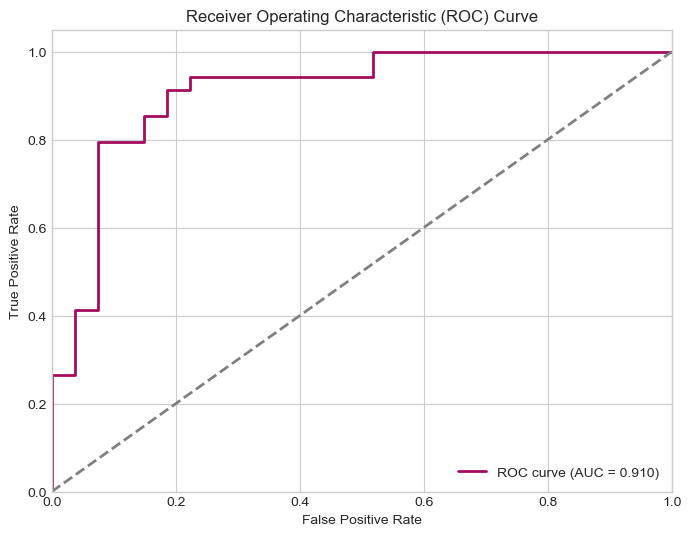

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Get the predicted probabilities for the positive class (class 1)
# Use the best estimator from the grid search
y_pred_proba = grid.best_estimator_.predict_proba(X_test)[:, 1]

# 2. Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# 3. Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# 4. Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#a50b5e', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

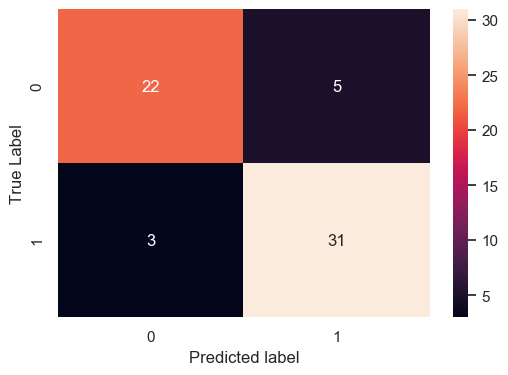

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.0) # Increase font size

def plot_conf_mat(y_test, ypred):
    fig, ax = plt.subplots(figsize=(6, 4))
    
    # Generate the heatmap
    ax = sns.heatmap(confusion_matrix(y_test, ypred),
                     annot=True,
                     cbar=True)
    
    # --- 💡 CRITICAL FIX LINES ---
    # These lines adjust the vertical limits to prevent annotations from being cut off
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    # ----------------------------

    plt.xlabel("Predicted label")
    plt.ylabel("True Label")
    plt.show() # Added plt.show() for standard plotting practice

# Assuming y_test and ypred are defined
plot_conf_mat(y_test, ypred)

In [40]:
grid.best_params_

{'C': 1, 'penalty': 'none', 'solver': 'sag'}

In [45]:
clf = LogisticRegression(C= 1, penalty='none', solver= 'sag')

from sklearn.model_selection import cross_val_score
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc = np.mean(cv_acc) # Mean accuracy
print("Cross-Validated Accuracy: ", cv_acc)

Cross-Validated Accuracy:  0.7228415300546448


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Ilango\AppData\Local\anaconda3\envs\aim

In [46]:
cv_prec = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_prec = np.mean(cv_prec) # Mean precision
print("Cross-Validated Precision: ", cv_prec)

Cross-Validated Precision:  0.7307139212062811


C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\Ilango\AppData\Local\anaconda3\envs\aim